# 本章概述

各位同学大家好，欢迎大家走进任务2:机器学习数学基础的章节，本任务属于选修章节，如果您的大学数学以及numpy基础较好，那么您可以跳过这个任务直接进入机器学习的学习任务中。在本章节中，我们会给大家介绍机器学习领域中的数学基础，包括高等数学、线性代数以及概率论与数理统计，并且我们会结合相应的内容，帮助大家回顾简单的numpy库的使用。本任务的知识点包括：
   - 高等数学与python应用：
      - 极限、微分学与泰勒展开近似
      - python模拟泰勒展开的近似
      - 极值的求解与最优化理论
      - python实现梯度下降法求解函数的极值（应用实例）
      - 对梯度下降法案例的改进（应用实例）
   - 线性代数与python应用
      - 线性方程组与numpy求解
      - 向量空间、矩阵及范数与numpy应用
      - 特征值和特征向量与numpy应用
      - 二次型的介绍及numpy应用
      - 线性代数实例：创建富有浮雕风格的图像（应用实例）
   - 概率论与数理统计与python应用
      - 条件概率与贝叶斯公式
      - 随机变量、分布函数与密度函数
      - 使用numpy与matplotlib可视化密度函数
      - 随机变量的数字特征----均值方差
      - 样本与总体的概念
      - 极大似然估计
      - 统计学实例：极大似然估计与抛硬币
   - 使用元胞自动机与种群密度曲线对生物的繁衍路径的模拟
      - 元胞自动机的介绍 
      - logistic生物种群密度曲线的介绍 
      - 使用元胞自动机与种群密度曲线对生物的繁衍路径的模拟 

本任务的课程内容十分丰富，也十分有趣，萌老师不仅给大家讲解每个数学理论背后的含义，还会带大家使用python和numpy探索其中的奥秘。看到这里，相信大家已经准备摩拳擦掌了吧？话不多说，我们Let's go！

# 2.1 高等数学与python应用

高等数学是由17世纪后微积分学，较深入的代数学、几何学以及它们之间的交叉内容所形成的一门基础学科。相对于初等数学和中等数学而言，学的数学较难，属于大学教程，因此常称“高等数学”。一般认为，16世纪以前发展起来的各个数学总的是属于初等数学的范畴，17世纪以后建立起了更为深入的微积分、空间解析几何与线性代数、级数、常微分方程等数学学科，因此称为高等数学。一般而言，高等数学涉及以下内容：
   - 极限理论
   - 一元函数的连续性
   - 一元函数的导数和微分
   - 一元函数的积分（不定积分、定积分（黎曼积分）、变限积分、无穷积分、暇积分等）
   - 级数（泰勒级数、傅立叶级数）
   - 多元函数的极限、连续性、微分
   - 多元函数的多重积分（二重积分、三重积分）
   - 曲线曲面积分等等

本课程属于理论与实际相结合的课程，因此在理论部分不会把所有的高等数学部分都介绍一遍，萌老师会介绍与机器学习密切相关的数学概念，如：极限、微分、梯度等等，如果同学们对其他内容感兴趣，萌老师在这里推荐几本专业书籍，方便同学们查看：
   - 复旦大学陈纪修老师的《数学分析》，在网上也能很容易找到他的视频，讲得也是超级棒。
   - 华东师范大学的《数学分析》，在中国大学mooc网站上也能找到免费视频。
   - 同济大学第七版《高等数学》，萌老师其实不想推荐这本书，因为这本书很多错误，但是这本书比较浅显易懂，适合基础比较薄弱的同学们翻阅。

## 2.1.1 极限、微分学与泰勒展开近似

**极限理论：**        
古代哲学家庄周的《庄子.天下篇》有这么一句话：一尺之棰，日取其半，万世不竭。这句话的意思是：如果你有一根长为一尺的木棒，每天截下一半，这样无休止的进行下去，最终木棒的长度会越来越接近于0，但是永远不会等于0。我们看看能不能使用python代码模拟下这个场景，但是在模拟之前需要对问题进行分析：
   - 第一天截$\frac{1}{2}$，剩余$\frac{1}{2}$；
   - 第二天继续截$\frac{1}{2}$，剩下$\frac{1}{4} = \frac{1}{2^2}$；
   - 第三天继续截剩下的$\frac{1}{2}$，剩下$\frac{1}{8} = \frac{1}{2^3}$
   - 我们似乎发现了规律，一直进行下去，直到进行了n次，剩余$\frac{1}{2^n}$
我们把剩余的长度记录下来，横坐标代表天数，纵坐标代表剩余的长度。

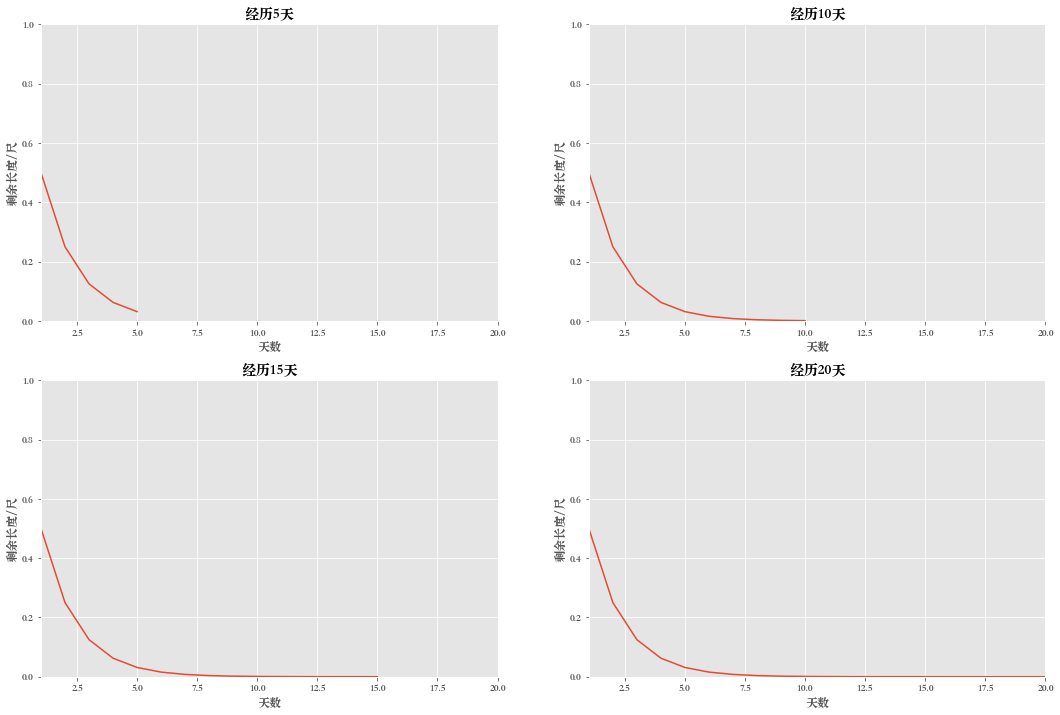

In [1]:
# 引入相关的工具包
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use("ggplot")
plt.rcParams['font.sans-serif']=['Songti SC']   # 用来正常显示中文
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 模拟5次的结果
res_5 = []    # 存储5次模拟结果的剩余长度
for i in range(5):
    res = 1/2**(i+1)
    res_5.append(res)
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
plt.plot(np.arange(5)+1,np.array(res_5))
plt.xlim([1,20])
plt.ylim([0,1])
plt.xlabel("天数")
plt.ylabel("剩余长度/尺")
plt.title("经历5天")

# 模拟10次的结果
res_10 = []    # 存储10次模拟结果的剩余长度
for i in range(10):
    res = 1/2**(i+1)
    res_10.append(res)
plt.subplot(2,2,2)
plt.plot(np.arange(10)+1,np.array(res_10))
plt.xlim([1,20])
plt.ylim([0,1])
plt.xlabel("天数")
plt.ylabel("剩余长度/尺")
plt.title("经历10天")

# 模拟15次的结果
res_15 = []    # 存储15次模拟结果的剩余长度
for i in range(15):
    res = 1/2**(i+1)
    res_15.append(res)
plt.subplot(2,2,3)
plt.plot(np.arange(15)+1,np.array(res_15))
plt.xlim([1,20])
plt.ylim([0,1])
plt.xlabel("天数")
plt.ylabel("剩余长度/尺")
plt.title("经历15天")

# 模拟20次的结果
res_20 = []    # 存储20次模拟结果的剩余长度
for i in range(20):
    res = 1/2**(i+1)
    res_20.append(res)
plt.subplot(2,2,4)
plt.plot(np.arange(20)+1,np.array(res_20))
plt.xlim([1,20])
plt.ylim([0,1])
plt.xlabel("天数")
plt.ylabel("剩余长度/尺")
plt.title("经历20天")
plt.show()

在上面的小案例中，我们可以观察到：随着分割次数的不断增加，绳子所剩的长度不断减少，无限趋近于0。让我们用更加严谨的话术来描述刚刚的小案例：随着分割绳子次数n不断增加，绳子所剩下的长度与0的差距（误差）越来越小。用数学式子表达就是：
$$
\lim _{n \rightarrow \infty} \frac{1}{2^n}=0
$$
其中，lim是极限的符号。通常，在实际的运用中，我们需要给出允许的差距的大小，比如：当我们得到了一种计算某个指标值的方法，并且这种方法计算的次数越多，计算的结果越精确。因此，我们需要给定我们在这次计算中能够忍受的误差大小，进而决定计算停止所需要的次数。当我们学到了后面的梯度下降法后，我们可以仔细品味这个算法，看看这个可忍受的误差大小对于任务的影响。

**导数：**           
让我们进入一个普通的广场，注意：假设 $t=19: 00$ 时广场里的温度 $u=20^{\circ} \mathrm{C}，\tilde{t}=19: 05$ 时广场里的温度 $\tilde{u}=25^{\circ} \mathrm{C}$，问广场里的温度在这 $5 \mathrm{~min}$ 里的平均变化率是多少?
这是一个极其简单的问题,其平均变化率为
$$
\frac{\Delta u}{\Delta t}=\frac{\tilde{u}-u}{\widetilde{t}-t}=1\left({ }^{\circ} \mathrm{C} / \mathrm{min}\right) 
$$
不过,若只研究“平均”变化率，有时会出现意外。再次来到刚才的广场，假设现在这个时刻 $t$，广场里的温度
$u=20^{\circ} \mathrm{C}$，一年之前的时刻 $\tilde{t}$，广场里的温度 $\tilde{u}=20^{\circ} \mathrm{C}$，则其平均变化率为
$$
\frac{\Delta u}{\Delta t}=\frac{\tilde{u}-u}{\widetilde{t}-t}=0\left({ }^{\circ} \mathrm{C} / \mathrm{min}\right) 
$$
显然，这是一个令人失望的结果。一般来说，广场里的温度随时间变化而不断变化，试图研究广场温度变化的这个目的落空了。究其原因，是因为平均变化率这个概念是“粗浅”的，只研究起点和终点的信息，完全没有考虑其过程，当然达不到精确研究温度变化率的目的，如何补救? 这时，我们让 $\Delta t \rightarrow 0$，也就是让时间差成为无穷小的数，写成
$$
\lim _{\Delta x \rightarrow 0} \frac{\Delta u}{\Delta t} \stackrel{\text { 记 }}{=} u^{\prime}(t),
$$
这里的 $t$ 被抽象为某一时刻，则 $u^{\prime}(t)$ 这个符号所表达的极限 $\lim _{\Delta x \rightarrow 0} \frac{\Delta u}{\Delta t} \stackrel{\text { 记 }}{=} u^{\prime}(t)$ 称为广场温度 $u$ 在 $t$ 时刻的瞬时变化率。由于 $t$ 为泛指的时刻点，则 $u^{\prime}(t)$ 即可表达“时时刻刻”广场温度的(瞬时)变化率。这就达到了精确研究温度在不同时刻的变化率的目的。

总结我们刚刚的引入例子，发现了一个规律：温度的(瞬时)变化率等于温度变化量与时间变化量之比的极限；我们把温度的变化使用函数$y=f(x)$来表达，那么函数$y=f(x)$关于自变量$x$在点$x=x_0$处的导数可以这样来表达：
$$
f^{\prime}\left(x_{0}\right)=\lim _{\Delta x \rightarrow 0} \frac{\Delta y}{\Delta x}=\lim _{\Delta x \rightarrow 0} \frac{f\left(x_{0}+\Delta x\right)-f\left(x_{0}\right)}{\Delta x}
$$
其中，$f^{\prime}\left(x_{0}\right)$称为函数$f(x)$在点$x=x_0$关于$x$的导数，它反映了函数$f(x)$在$x=x_0$处的瞬时变化信息，如果$f^{\prime}\left(x_{0}\right)$的绝对值越大，那么函数在该点处越“陡峭”。         
下面我们用一个小案例来探讨下：          
函数$y=x^2$的导函数为$y=2x$，我们来观察下函数和导数之间的关系！在$x=1$时，$y$在该点的导数为2；在$x=2$时，$y$在该点的导数为4。按照上面说的结论，函数$y=x^2$在点$x=2$比在点$x=1$处更陡峭！



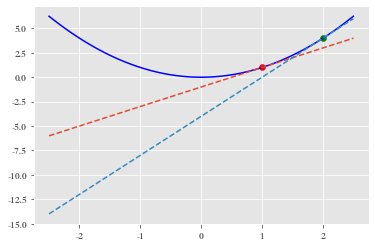

In [2]:
x = np.linspace(-2.5,2.5,100)  ## 设定画图的x区间,从-2.5到2.5，一共100个点
y = np.square(x)       ## 计算y = x^2
dy_x1 = 2  ## 函数在x=1点处的导数
dy_x2 = 4  ## 函数在x=2点处的导数
plt.plot(x,y,c="blue")    ## 画出y = x^2
plt.plot(x,dy_x1*x-1,'--')   ## 画出x=1处的切线，红色
plt.scatter(1,1,c='r')
plt.plot(x,dy_x2*x-4,'--')   ## 画出x=2处的切线，绿色
plt.scatter(2,4,c='g')
plt.show()

正如我们所料，函数$y=x^2$在点$x=2$比在点$x=1$处更陡峭！$y=x^2$是一个比较简单的函数，我们实际中碰到的函数一般都会比$y=x^2$复杂得多，因此我们需要掌握计算复杂函数的导数的方法，下面列举了基本初等函数的导数以及他们求导的运算法则，几乎大部分的导数的计算都可以通过基本初等函数的导数以及他们求导的运算法则求出：              
基本初等函数的导函数：        
$$
\begin{aligned}
&\left(x^{a}\right)^{\prime}=\alpha x^{a-1}(\alpha \text { 为常数 }), \quad\left(a^{x}\right)^{\prime}=a^{x} \ln a(a>0, a \neq 1), \quad\left(\mathrm{e}^{x}\right)^{\prime}=\mathrm{e}^{x}, \quad\left(\log _{a} x\right)^{\prime}=\frac{1}{x \ln a}(a>0, a \neq 1),\\
&(\ln x)^{\prime}=\frac{1}{x}, \quad(\sin x)^{\prime}=\cos x, \quad(\cos x)^{\prime}=-\sin x, \quad(\arcsin x)^{\prime}=\frac{1}{\sqrt{1-x^{2}}},\\
&(\arccos x)^{\prime}=-\frac{1}{\sqrt{1-x^{2}}}, \quad(\tan x)^{\prime}=\sec ^{2} x, \quad(\cot x)^{\prime}=-\csc ^{2} x, \quad(\arctan x)^{\prime}=\frac{1}{1+x^{2}},\\
&(\operatorname{arccot} x)^{\prime}=-\frac{1}{1+x^{2}}, \quad(\sec x)^{\prime}=\sec x \tan x, \quad(\csc x)^{\prime}=-\csc x \cot x,\\
&\left[\ln \left(x+\sqrt{x^{2}+1}\right)\right]^{\prime}=\frac{1}{\sqrt{x^{2}+1}}, \quad\left[\ln \left(x+\sqrt{x^{2}-1}\right)\right]^{\prime}=\frac{1}{\sqrt{x^{2}-1}}
\end{aligned}
$$

运算法则：         
和、差的导数：$[u(x) \pm v(x)]^{\prime}=u^{\prime}(x) \pm v^{\prime}(x)$

积的导数：$[u(x) v(x)]^{\prime}=u^{\prime}(x) v(x)+u(x) v^{\prime}(x)$

商的导数：$\left[\frac{u(x)}{v(x)}\right]^{\prime}=\frac{u^{\prime}(x) v(x)-u(x) v^{\prime}(x)}{[v(x)]^{2}}, v(x) \neq 0$

复合函数的导数：$\{f[g(x)]\}^{\prime}=f^{\prime}[g(x)] g^{\prime}(x)$

下面，我们用一个计算的例子结束导数的学习：

求$y=e^{\sin \frac{1}{x}}+\cos \frac{\pi}{3}$的导函数：
$$
y^{\prime}=e^{\sin \frac{1}{x}}\left(\sin \frac{1}{x}\right)^{\prime}+\left(\cos \frac{\pi}{3}\right)^{\prime}=e^{\sin \frac{1}{x}} \cdot \cos \frac{1}{x} \cdot\left(\frac{1}{x}\right)^{\prime}=-\frac{1}{x^{2}} e^{\sin \frac{1}{x}} \cdot \cos \frac{1}{x}
$$

In [251]:
# 使用sympy验证上面的求导案例：
from sympy import * 
x = Symbol('x')   ## 创建一个符号
y = E**(sin(1/x))+ cos(pi/3)    ## 创建一个y关于x的表达
print("y对x的导数为：y'=",diff(y))

y对x的导数为：y'= -exp(sin(1/x))*cos(1/x)/x**2


**微分：**

我们是否有想过这样一个问题呢？当我们的一个函数非常复杂的时候，我们能否用一个简单且可操作的函数去近似替代这个函数呢？比如，假设股票价格与某家公司的业绩的关系是非常复杂的函数关系，我们对这个复杂的函数关系无从下手，那么我们自然就能想到这个问题：能否用简单的函数去近似替代复杂的股价关系，最简单的函数是线性函数（这似乎是一个疯狂的想法！）。因此，微分就是这么一个概念：使用线性函数近似替代复杂的函数关系！

问题来了，我们如何使用微分使用线性函数来近似复杂的函数关系呢？首先，我们假设复杂函数$y=f(x)$在点$x = x_0$变化了$\Delta y$，那么线性函数就会变化$A\Delta x + o(\Delta x)$，其中,A是一个未知的常数，$o(\Delta x)$为近似带来的误差。因此：
$$
\Delta y = A\Delta x + o(\Delta x)
$$
由于当$\Delta x$越小，近似效果越好，误差$o(\Delta x)$越小趋近于0，因此，我们不难看出$A =  \lim _{\Delta x \rightarrow 0} \frac{\Delta y}{\Delta x}= f^{'}(x_0)$；在$\Delta x$趋近于0的过程中，$\Delta y$可以写成$dy$，$\Delta x$可以写成$dx$，因此函数$y=f(x)$在$x=x_0$点处的微分的表达式是：
$$
dy = f^{'}(x_0) dx
$$
![jupyter](./picture/1.png)

(图片来源于网络，如有侵权请联系删除)

例子：函数为：$y=\ln \left(1+e^{x^{2}}\right)$，求$dy$
$$
\begin{aligned}
\mathrm{d} y &=\frac{1}{1+e^{x^{2}}} \mathrm{~d}\left(1+e^{x^{2}}\right) \\
&=\frac{1}{1+e^{x^{2}}} \cdot e^{x^{2}} \mathrm{~d}\left(x^{2}\right) \\
&=\frac{1}{1+e^{x^{2}}} \cdot e^{x^{2}} \cdot 2 x \mathrm{~d} x \\
&=\frac{2 x e^{x^{2}}}{1+e^{x^{2}}} \mathrm{~d} x
\end{aligned}
$$

In [4]:
# 使用sympy验证上面的微分案例：
from sympy import * 
x = Symbol('x')   ## 创建一个符号
y = ln(1+E**(x**2))    ## 创建一个y关于x的表达
print("y对x的微分为：dy = %s dx" % diff(y))

y对x的微分为：dy = 2*x*exp(x**2)/(exp(x**2) + 1) dx


**泰勒展开：**



在刚刚讨论微分的概念的时候，我们使用微分的目的是使用最简单的线性函数去近似替代复杂的非线性函数，但是我们不得不面对一个不可避免的问题，那就是误差。在刚刚的微分讨论中，我们只知道当$\Delta x$越小，近似的误差越小，近似效果越好。现在我们改进一下，使用我们熟知的多项式函数进行近似而不是最简单线性函数进行近似，因为这会让我们的近似效果越来越好，毕竟某些复杂的函数不是一个线性函数能够近似的，这种使用多项式函数近似的方法叫做泰勒展开。

那什么是多项式函数呢？顾名思义：函数中只有多项式的函数就是多项式函数，如：$f(x) = 3x^2+2x+2$是多项式函数，$f(x) = 3x^4+2x^3+4$也是多项式函数，$f(x)=sin(x) + 3x^2 + e^x$不是多项式函数。

问题来了，我们如何使用多项式函数近似复杂的函数呢？我们知道微分在近似的时候需要用到一阶导数，那么我们使用多项式函数近似的时候为了更充分的近似某个点$x_0$附近的函数值，我们需要用到高阶导数，比如：二阶导数、三阶导数......用的阶数越高，则近似的精确程度越高。具体而言：

若函数 $f(x)$ 在包含 $x_{0}$ 的某个开区间 $(a, b)$ 上具有 $(n+1)$ 阶的导数, 那么对于任一 $x \in(a, b)$, 有：
$$
f(x)=\frac{f\left(x_{0}\right)}{0 !}+\frac{f^{\prime}\left(x_{0}\right)}{1 !}\left(x-x_{0}\right)+\frac{f^{\prime \prime}\left(x_{0}\right)}{2 !}\left(x-x_{0}\right)^{2}+\ldots+\frac{f^{(n)}\left(x_{0}\right)}{n !}\left(x-x_{0}\right)^{n}+R_{n}(x)
$$
其中, $R_{n}(x)=\frac{f^{(n+1)}(\varepsilon)}{(n+1) !}\left(x-x_{0}\right)^{n+1}$, 此处的 $\varepsilon$ 为 $x_{0}$ 与 $x$ 之间的某个值。 $f(x)$ 称为 $n$ 阶泰勒公式, 其中, $P_{n}(x)=f\left(x_{0}\right)+f^{\prime}\left(x_{0}\right)\left(x-x_{0}\right)+\cdots+\frac{f^{(n)}\left(x_{0}\right)}{n !}\left(x-x_{0}\right)^{n}$ 称为 $n$ 次泰勒多项式, 它与 $f(x)$ 的误差
$R_{n}(x)=\frac{f^{(n+1)}(\varepsilon)}{(n+1) !}\left(x-x_{0}\right)^{n+1}$ 称为 $n$ 阶泰勒余项 。

我们常见函数的泰勒展开罗列如下：
$$
\begin{aligned}
&e^{x}=1+x+\frac{x^{2}}{2 !}+\cdots+\frac{x^{n}}{n !}+o\left(x^{n}\right) \\
&\sin x=x-\frac{x^{3}}{3 !}+\frac{x^{5}}{5 !}+\cdots+(-1)^{m-1} \frac{x^{2 m-1}}{(2 m-1) !}+o\left(x^{2 m}\right) ; \\
&\cos x=1-\frac{x^{2}}{2 !}+\frac{x^{4}}{4 !}+\cdots+(-1)^{m} \frac{x^{2 m}}{(2 m) !}+o\left(x^{2 m+1}\right) \\
&\ln (1+x)=x-\frac{x^{2}}{2}+\frac{x^{3}}{3}+\cdots+(-1)^{n-1} \frac{x^{n}}{n}+o\left(x^{n}\right) ; \\
&(1+x)^{a}=1+\alpha x+\frac{\alpha(\alpha-1)}{2 !} x^{2}+\cdots+\frac{a(\alpha-1) \cdot \cdot(\alpha-n+1)}{n !} x^{n}+o\left(x^{n}\right) ; \\
&\frac{1}{1-x}=1+x+x^{2}+\cdots+x^{n}+o\left(x^{n}\right)
\end{aligned}
$$
下面，让我们来通过编写代码的形式来观察下泰勒公式的威力吧

Taylor expansion at n=1 x
Taylor expansion at n=3 -x**3/6 + x
Taylor expansion at n=5 x**5/120 - x**3/6 + x
Taylor expansion at n=7 -x**7/5040 + x**5/120 - x**3/6 + x
Taylor expansion at n=9 x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x


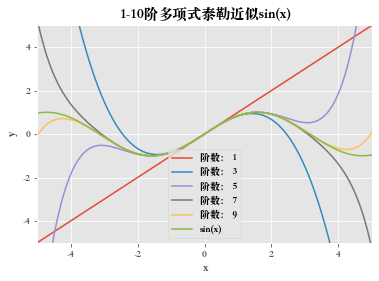

In [5]:
x = Symbol('x')
f = sin(x)

# 递归函数，求n!
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n*factorial(n-1)

# 泰勒展开式
def taylor(function,x0,n):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(x,i).subs(x,x0))/(factorial(i))*(x-x0)**i  ## sympy.subs()可以将数学表达式中的变量或表达式的所有实例替换为其他变量或表达式或值。
        i += 1
    return p

# 描述近似结果
def plot():
    x_lims = [-5,5]
    x1 = np.linspace(x_lims[0],x_lims[1],800)
    y1 = []
    # 从1阶近似到10阶近似，阶数间隔为2
    for j in range(1,10,2):
        func = taylor(f,0,j)
        print('Taylor expansion at n='+str(j),func)
        for k in x1:
            y1.append(func.subs(x,k))
        plt.plot(x1,y1,label='阶数： '+str(j))
        y1 = []
    # 画图
    plt.plot(x1,np.sin(x1),label='sin(x)')
    plt.xlim(x_lims)
    plt.ylim([-5,5])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('1-10阶多项式泰勒近似sin(x)')
    plt.show()
    
plot()

## 2.1.2 极值的求解与最优化理论

在刚才到底讨论中，我们已经知道导数雨微分的强大作用，那我们接下来一起来探讨下导数的另外一个作用，那就是求极值！首先，什么是极值呢？极值，我们俗称局部的最值，也就是说：极小值就是局部的最小值，极大值就是局部的极大值。可能文字不太直观，我们来看看一组图，就能立刻知道什么是极值：
![jupyter](./picture/2.png)

(图片来源于网络，如有侵权请联系删除)

从上面的图，我们不难看出一个结论：如果函数是可导的话，在极值点的地方，变化率为0，也就是导数为0。那导数为0的地方一定是极值点吗？答案是不一定的！我们可以观察一个图：

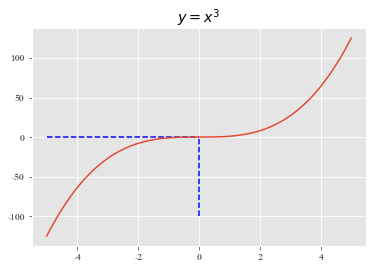

In [40]:
x = np.linspace(-5,5,1000)
y = x**3
plt.plot(x,y)
plt.vlines(x=0,ymin= -100,ymax=0,linestyle="--",color="b")
plt.hlines(y=0,xmin= -5,xmax=0,linestyle="--",color="b")
plt.title(r"$y = x^3$")
plt.show()

可以看到，$y=x^3$在原点(0,0)的地方导数为0，但是这个点并不是极值点，因此导数为0的点不一定是极致点。那我们如何找一个函数的极值呢？下面介绍两个方法：梯度下降法与牛顿法。

**（1）梯度下降法：**

假设这样一个场景：假设我们被困一座山上，我们得找到一个方法下山。因此，我们的下山路径应该是这样的：找到一个下降的方向（最好是下降最快的方向），然后朝着该方向下降一段距离，循环往复，知道下降到山谷。在这个场景中，我们需要明确几个概念：
   - 下降的方向（最好是下降最快的方向）：这个概念在函数的描述中叫做负梯度，梯度是一个矢量的概念，梯度的大小就是函数$f(x)$在该点的导数值的绝对值，梯度的方向是函数值上升最快的方向。因此，我们找到的下山方向是负梯度方向；
   - 下降一段距离：这个概念在算法的描述叫做步长，不同的步长影响我们下降到山底的速度，步长太小，我们走的越慢，因此走到山底的时间就越长，步长太大，我们就会在山底附近徘徊或者直接去不到山底，因此这是一个十分重要的量。

![jupyter](./picture/3.png)

总结下梯度下降法：我们需要找到函数的极小值点（极大值点可以加负号变成求解极小值点问题）
   - 随机选定一个初始点
   - 从该点出发，计算该点的梯度，下降方向为负梯度方向
   - 在该点往负梯度方向上走步长长度的路程
   - 判断下一个点是否为极小值点（梯度几乎为0？函数值变化不大？），如果不是极小值点，那么循环以上过程，如果是的话输出这个极小值点。

我们使用python来演示一下这个过程：寻找$y=x^2$的极小值点。

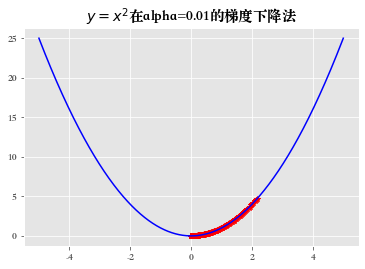

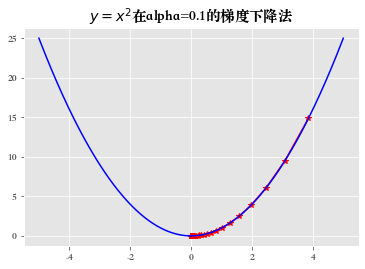

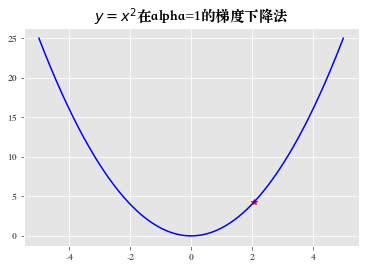

In [115]:
class Gradient_Descent_x2:
    def __init__(self,alpha):
        self.__alpha = alpha
        
    def __getGradient(self,x):
        return 2*x
    
    def __getFunctionValue(self,x):
        return x**2
    def __plotGradientDescent(self,xList,yList):
        x = np.linspace(-5,5,1000)
        y = self.__getFunctionValue(x)
        plt.plot(np.array(xList),np.array(yList),c="red",marker="*")
        plt.plot(x,y,c="blue")
        plt.title(r"$y=x^2$在alpha="+str(self.__alpha)+"的梯度下降法")
        plt.show()
    def Start(self):
        x = np.random.uniform(0,5)
        xList = []
        yList = []
        while self.__getGradient(x) >= 10**(-10):
            xList.append(x)
            yList.append(self.__getFunctionValue(x))
            x = x - self.__getGradient(x) * self.__alpha
        self.__plotGradientDescent(xList,yList)
if __name__ == "__main__":
    x2gd1 = Gradient_Descent_x2(0.01)
    x2gd1.Start()
    x2gd2 = Gradient_Descent_x2(0.1)
    x2gd2.Start()
    x2gd3 = Gradient_Descent_x2(1)
    x2gd3.Start()
        

我们刚刚讨论了，导数为0的点未必是极小值点，那我们看看梯度下降法是否会在某些情况下失效？我们使用的例子依旧是$y = x^3$

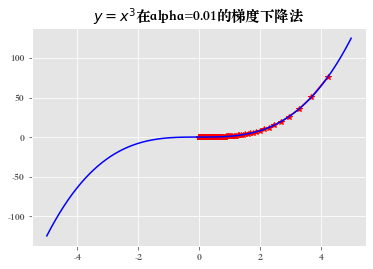

In [117]:
class Gradient_Descent_x3:
    def __init__(self,alpha):
        self.__alpha = alpha
        
    def __getGradient(self,x):
        return 3*x**2
    
    def __getFunctionValue(self,x):
        return x**3
    def __plotGradientDescent(self,xList,yList):
        x = np.linspace(-5,5,1000)
        y = self.__getFunctionValue(x)
        plt.plot(np.array(xList),np.array(yList),c="red",marker="*")
        plt.plot(x,y,c="blue")
        plt.title(r"$y=x^3$在alpha="+str(self.__alpha)+"的梯度下降法")
        plt.show()
    def Start(self):
        x = np.random.uniform(0,5)
        xList = []
        yList = []
        while self.__getGradient(x) >= 10**(-10):
            xList.append(x)
            yList.append(self.__getFunctionValue(x))
            x = x - self.__getGradient(x) * self.__alpha
        self.__plotGradientDescent(xList,yList)
if __name__ == "__main__":
    x3gd = Gradient_Descent_x3(0.01)
    x3gd.Start()

        

不出意外，只是用梯度信息的梯度下降法在面对$y=x^3$求极小值的时候失效了，也验证了我们所说的导数为0的点未必是极小值点。下面，我们来介绍一种比梯度下降法更快的优化算法：牛顿法。

**（2）牛顿法：**
刚刚给大家介绍的梯度下降法只用到了梯度信息，我们能否使用更高阶的导数信息呢？这个问题我们应该已经很熟悉了，那就是泰勒展开！我们可以使用二阶泰勒公式近似函数，我们可以来看看这个过程：
牛顿法的基本思想是: 在现有极小点估计值的附近对 $f(x)$ 做二阶泰勒展开, 进而找到极小点的下一个估计值（跟梯度下降法差不多，只不过是下降的方向改变了）。设 $x_{k}$ 为迭代到第k次的极小点估计值, 则：
$$
\varphi(x)=f\left(x_{k}\right)+f^{\prime}\left(x_{k}\right)\left(x-x_{k}\right)+\frac{1}{2} f^{\prime \prime}\left(x_{k}\right)\left(x-x_{k}\right)^{2}
$$
由于在极小值点的导数为0，因此$\varphi^{\prime}(x)=0$，即：
$$
f^{\prime}\left(x_{k}\right)+f^{\prime \prime}\left(x_{k}\right)\left(x-x_{k}\right)=0
$$
最终，我们可以求出每次迭代点之间的关系：
$$
x_{k+1}=x_{k}-\alpha \frac{f^{\prime}\left(x_{k}\right)}{f^{\prime \prime}\left(x_{k}\right)}, \quad k=0,1, \cdots
$$
如果大家看不懂上面的推导过程也是没有关系的，现在给大家总结下这个算法，大家只需要知道这个过程就可以了，原理尽量听懂吧。
   - 随机选定一个初始点
   - 从该点出发，计算该点的梯度，下降方向为$-\frac{f^{\prime}\left(x_{k}\right)}{f^{\prime \prime}\left(x_{k}\right)}$
   - 在该点往上述方向上走步长长度的路程
   - 判断下一个点是否为极小值点（梯度几乎为0？函数值变化不大？），如果不是极小值点，那么循环以上过程，如果是的话输出这个极小值点。
   
下面我们使用牛顿法实现求函数$y = sin(x)$的极小值：

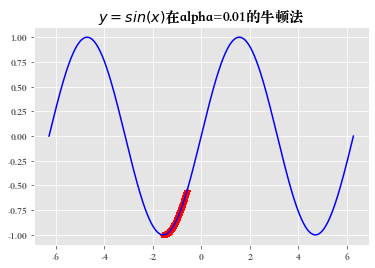

In [250]:
class Newton:
    def __init__(self,alpha):
        self.__alpha = alpha
    
    def __getGradient(self,x):
        return np.cos(x)
    
    def __getSecondDerivative(self,x):
        return -np.sin(x)
    def __getFunctionValue(self,x):
        return np.sin(x)
    def __plotNewton(self,xList,yList):
        x = np.linspace(-2*np.pi,2*np.pi,1000)
        y = self.__getFunctionValue(x)
        plt.plot(np.array(xList),np.array(yList),c="red",marker="*")
        plt.plot(x,y,c="blue")
        plt.title(r"$y=sin(x)$在alpha="+str(self.__alpha)+"的牛顿法")
        plt.show()
        
    def Start(self):
        x = np.random.uniform(-np.pi/2,0)
        xList = []
        yList = []
        while self.__getGradient(x) >= 10**(-8):
            xList.append(x)
            yList.append(self.__getFunctionValue(x))
            x = x - self.__alpha * self.__getGradient(x)/self.__getSecondDerivative(x)
        self.__plotNewton(xList,yList)
if __name__ == "__main__":
    nt = Newton(0.01)
    nt.Start()

## 2.1.3 优化算法的改进(选学)

在上面的讨论中，我们已经初步掌握了两大核心优化算法，可是我们还是有几个问题还没有解决，一起来总结一下吧！
   - (1)讨论的自变量个数只有一个，能否推广到更高维度的空间呢？
   - (2)上面所讨论的步长都是一个固定值，能否找到一个自适应的步长呢？
   - (3)能否跨过类似于$y=x^3$当$x=0$处的点或者找到全局最小点呢？
   
这些问题其实也是现代优化算法的难题，萌老师从入门出发带大家去探索，如果大家想继续深入的话，需要大家自己查看最新论文，多多实验。

**（1）讨论的自变量个数只有一个，能否推广到更高维度的空间呢？**

首先，我先回答下这个问题答案：可以，不但可以，而且很简单就可以推广出去了。让我们先来看看梯度下降法是如何进行高维推广的。梯度下降法推广至高维的关键是导数如何推广至高维，一维的导数是一个数值，一个数字，但是高维的导数叫做梯度向量，使用向量去表达。如：
$$
\begin{aligned}
&J(\Theta)=0.55-\left(6 \theta_{1}+4 \theta_{2}-10 \theta_{3}\right) \\
&\nabla J(\Theta)=\left\langle\frac{\partial J}{\partial \theta_{1}}, \frac{\partial J}{\partial \theta_{2}}, \frac{\partial J}{\partial \theta_{3}}\right\rangle=(-6,-4,10)
\end{aligned}
$$
我们可以看到，梯度就是分别对每个变量进行微分（其他变量当作常数），然后用逗号分割开，梯度是用<>包括起来，说明梯度其实一个向量。因此，其实多维度的梯度向量法的更新公式就变成了：
$$
x^{k+1} = x^{k} - \alpha \nabla J(x^{k})
$$
但是值得注意的是，这里的$x^{k+1}$与$x^{k}$都是向量化形式。我们使用一个例子说明下：使用梯度下降法求解$f(x_1,x_2) = x_1^2 + 3x_2^2 $的极小值。

我们不难看出，这个函数的极小值点是：（0,0）;下面，我们使用python验证函数的极小值：

In [217]:
class GradientDescent2D:
    def __init__(self,alpha):
        self.__alpha = alpha
    def __getFunctionValue(self,xArray):
        return xArray[0]**2 + 3*xArray[1]**2
    
    def __getGradient(self,xArray):
        return np.array([2*xArray[0],6*xArray[1]])
    
    def Start(self):
        xArray = np.random.rand(2)
        while np.sum(np.abs(self.__getGradient(xArray))) >= 10**(-8):
            xArray = xArray - self.__alpha * self.__getGradient(xArray)
        print("最优解为:",xArray)
        print("最优解的函数值为:",self.__getFunctionValue(xArray))
        
if __name__ == "__main__":
    gd = GradientDescent2D(0.01)
    gd.Start()

最优解为: [4.90823405e-09 5.69816469e-26]
最优解的函数值为: 2.4090761496266242e-17


接下来，我们把牛顿法也推广至高维空间，看看高维空间下的牛顿法效果如何！高维空间与一维的区别，其实也是方向的表达上，一维的牛顿法的下降方向是$-\frac{f^{\prime}\left(x_{k}\right)}{f^{\prime \prime}\left(x_{k}\right)}$，他与导数与二阶导数有关，而刚刚的梯度下降法也已经表明了导数推广至多维叫梯度向量，而二阶导数推广至多维叫黑塞矩阵：
$$
H(f)=\left[\begin{array}{cccc}
\frac{\partial^{2} f}{\partial x_{1}^{2}} & \frac{\partial^{2} f}{\partial x_{1} \partial x_{2}} & \cdots & \frac{\partial^{2} f}{\partial x_{1} \partial x_{n}} \\
\frac{\partial^{2} f}{\partial x_{2} \partial x_{1}} & \frac{\partial^{2} f}{\partial x_{2}^{2}} & \cdots & \frac{\partial^{2} f}{\partial x_{2} \partial x_{n}} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^{2} f}{\partial x_{n} \partial x_{1}} & \frac{\partial^{2} f}{\partial x_{n} \partial x_{2}} & \cdots & \frac{\partial^{2} f}{\partial x_{n}^{2}}
\end{array}\right]
$$
在黑塞矩阵中，每个元素都是函数对自变量的二阶偏导数，这个矩阵包含了所有关于二阶导数的信息。那多维的牛顿法的下降方向类比一维的牛顿法就是：
$$
\mathbf{x}_{k+1}=\mathbf{x}_{k}-\left[H f\left(\mathbf{x}_{k}\right)\right]^{-1} \nabla f\left(\mathbf{x}_{k}\right)
$$
其实就是把二阶导数的倒数变成黑塞矩阵的逆矩阵（矩阵的逆和数字的倒数是异曲同工的），下面我们使用python实现这个多维牛顿法吧：求函数$f(x_1,x_2) = \frac{3}{2}x_1^2 + \frac{1}{2}x_2^2-x_1x_2-x_1 $;

分析：梯度向量：$\nabla f = (3x_1-x_2-1,x_2-x_1)^T$,黑塞矩阵：$\left[ \begin{matrix} 3 & -1 \\ -1 & 1 \end{matrix} \right]$

In [241]:
class Newton2D:
    def __init__(self,alpha):
        self.__alpha = alpha
    def __getGradient(self,xArray):
        return np.array([[3.0*xArray[0,0]-xArray[1,0]-1] ,[xArray[1,0]-xArray[0,0]]])
    def __getHessian(self):
        return np.array([[3.0,-1.0],[-1.0,1.0]])
    def __getFunctionValue(self,xArray):
        return 3.0/2*xArray[0,0]**2 + 1.0/2*xArray[1,0]**2 - xArray[0,0]*xArray[1,0] - xArray[0,0]
    def Start(self):
        xArray = np.random.rand(2,1)  ## 列向量
        while np.sum(np.square(self.__getGradient(xArray))) >= 10**(-8):
            xArray = xArray - np.matmul(self.__alpha * np.linalg.inv(self.__getHessian()) , self.__getGradient(xArray))  ## 矩阵乘法
        print("最优解为：",np.array([xArray[0,0],xArray[1,0]]))
if __name__ == "__main__":
    nt2d = Newton2D(0.001)
    nt2d.Start()

最优解为： [0.50002357 0.49998054]


**(2)上面所讨论的步长都是一个固定值，能否找到一个自适应的步长呢？**

刚刚，我们已经完成了梯度下降法与牛顿法从一维推广至多维，但是为了阐述清楚后面的理论，我们将还是先讨论一维的情况，多维的情况请直接推广。在优化一个函数，求解这个函数的极小值点的时候，我们希望在迭代初期步长大（可以更快收敛到极小值点），在迭代后期步长小（寻找的极小值点更精确）。因此，我们可以在迭代初期除以一个较小的数，在迭代后期除以一个大的数，这样就能完成自动更新步长。那问题来了，这个数究竟是什么呢？其中一个可行的办法是：在迭代的时候记录每一步的梯度值，这个数就是累计的梯度平方和，因为在迭代初期累计的梯度平方和较小，因此步长更大；相反，在迭代后期累计的梯度值越来越多，梯度平方和就会越来越大，步长就会越小。即：
$$
x^{k+1} \leftarrow x^{k}-\frac{\alpha}{\sqrt{\sum_{i=0}^{k}\left(\nabla f(x_i^{i})\right)^{2}}} \nabla f(x_i^k)
$$
我们使用这种自适应步长的梯度下降法来求解函数$f(x) = x^2$的极小值点：

In [246]:
class AdaptiveGradientDescent:
    def __init__(self,alpha):
        self.__alpha = alpha
    def __getGradient(self,x):
        return 2*x
    def __getFunctionValue(self,x):
        return x**2
    def __getCumSum(self,gradList):
        return np.sum(np.square(np.array(gradList)))
    def Start(self):
        x = np.random.rand(1)
        gradList = []
        while np.abs(self.__getGradient(x)) >= 10**(-8):
            gradList.append(self.__getGradient(x))
            x = x - self.__alpha / self.__getCumSum(gradList) * self.__getGradient(x)
        print("最优解为：",x)
        
if __name__ == "__main__":
    agd = AdaptiveGradientDescent(1)
    agd.Start()

最优解为： [4.73402297e-09]


**(3)能否跨过类似于 𝑦=𝑥3 当 𝑥=0 处的点或者找到全局最小点呢？**

直到现在为止，我们依旧对这个问题避而不谈，因为我们刚刚讨论的所有东西都不能解决这个问题，但是灵感来源于现实，我们来看看这个简单的解决方案吧。我们还是想成下山的场景，下山中遇到了平坡，如果只有导数的信息，我们是无法逃出这个平坡，因为导数会告诉我们平坡的导数是0，这里已经是山底，可是事实并不是，那怎么办呢？事实上，只需要在该点施加一个向前的力，我们就能继续往下走了，这个作用我们称为动量(momentum)！如图所示：
![jupyter](./picture/4.png)

(图片来源于李宏毅老师的《机器学习》)

adam的相关内容涉及的内容较多，感兴趣的同学可以查看萌老师写的详细文章：https://zhuanlan.zhihu.com/p/136185624